<a href="https://colab.research.google.com/github/Dhivyaindhu/Skill_upgrade-projects--task-1/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
# loading our dataset

data=pd.read_csv('/content/amazon kindle.review.csv')

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [ ]:
data.head()

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0             0       11539  B0033UV8HI  [8, 10]       3   
1             1        5957  B002HJV4DE   [1, 1]       5   
2             2        9146  B002ZG96I4   [0, 0]       3   
3             3        7038  B002QHWOEU   [1, 3]       3   
4             4        1776  B001A06VJ8   [0, 1]       4   

                                          reviewText   reviewTime  \
0  Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1  Great short read.  I didn't want to put it dow...   10 8, 2013   
2  I'll start by saying this is the first of four...  04 11, 2014   
3  Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4  I did not expect this type of book to be in li...  12 31, 2012   

       reviewerID  reviewerName                   summary  unixReviewTime  
0  A3HHXRELK8BHQG        Ridley  Entertaining But Average      1283385600  
1  A2RGNZ0TRF578I  Holly Butler   Terrific menage scenes!      1381190400  
2  A3S0H2HV6U1I7F       Merissa          Snapdragon Alley      1397174400  
3   AC4OQW3GZ919J    Cleargrace    very light murder cozy      1404518400  
4  A3C9V987IQHOQD      Rjostler                      Book      1356912000

In [ ]:
data.tail()

Unnamed: 0.1  Unnamed: 0        asin helpful  rating  \
11995         11995        2183  B001DUGORO  [0, 0]       4   
11996         11996        6272  B002JCSFSQ  [2, 2]       5   
11997         11997       12483  B0035N1V7K  [0, 1]       3   
11998         11998        3640  B001W1XT40  [1, 2]       1   
11999         11999       11398  B003370JUS  [5, 6]       3   

                                              reviewText   reviewTime  \
11995  Valentine cupid is a vampire- Jena and Ian ano...  02 28, 2014   
11996  I have read all seven books in this series. Ap...  05 16, 2011   
11997  This book really just wasn't my cuppa.  The si...  07 26, 2013   
11998  tried to use it to charge my kindle, it didn't...  09 17, 2013   
11999  Taking Instruction is a look into the often hi...   07 5, 2012   

           reviewerID                   reviewerName  \
11995  A1OKS5Q1HD8WQC                  lisa jon jung   
11996   AQRSPXLNEQAMA                        TerryLP   
11997  A2T5QLT5VXOJAK                        hwilson   
11998  A28MHD2DDY6DXB  Allison A. Slater "Gryphon50"   
11999  A3JUXLB4K9ZXCC                      Dafna Yee   

                                                 summary  unixReviewTime  
11995                                               jena      1393545600  
11996                                Peacekeepers Series      1305504000  
11997                                    a little creepy      1374796800  
11998                                        didn't work      1379376000  
11999  If you like BDSM with a touch of romance, this...      1341446400

In [ ]:
data

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0                 0       11539  B0033UV8HI  [8, 10]       3   
1                 1        5957  B002HJV4DE   [1, 1]       5   
2                 2        9146  B002ZG96I4   [0, 0]       3   
3                 3        7038  B002QHWOEU   [1, 3]       3   
4                 4        1776  B001A06VJ8   [0, 1]       4   
...             ...         ...         ...      ...     ...   
11995         11995        2183  B001DUGORO   [0, 0]       4   
11996         11996        6272  B002JCSFSQ   [2, 2]       5   
11997         11997       12483  B0035N1V7K   [0, 1]       3   
11998         11998        3640  B001W1XT40   [1, 2]       1   
11999         11999       11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1      Great short read.  I didn't want to put it dow...   10 8, 2013   
2      I'll start by saying this is the first of four...  04 11, 2014   
3      Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4      I did not expect this type of book to be in li...  12 31, 2012   
...                                                  ...          ...   
11995  Valentine cupid is a vampire- Jena and Ian ano...  02 28, 2014   
11996  I have read all seven books in this series. Ap...  05 16, 2011   
11997  This book really just wasn't my cuppa.  The si...  07 26, 2013   
11998  tried to use it to charge my kindle, it didn't...  09 17, 2013   
11999  Taking Instruction is a look into the often hi...   07 5, 2012   

           reviewerID                   reviewerName  \
0      A3HHXRELK8BHQG                         Ridley   
1      A2RGNZ0TRF578I                   Holly Butler   
2      A3S0H2HV6U1I7F                        Merissa   
3       AC4OQW3GZ919J                     Cleargrace   
4      A3C9V987IQHOQD                       Rjostler   
...               ...                            ...   
11995  A1OKS5Q1HD8WQC                  lisa jon jung   
11996   AQRSPXLNEQAMA                        TerryLP   
11997  A2T5QLT5VXOJAK                        hwilson   
11998  A28MHD2DDY6DXB  Allison A. Slater "Gryphon50"   
11999  A3JUXLB4K9ZXCC                      Dafna Yee   

                                                 summary  unixReviewTime  
0                               Entertaining But Average      1283385600  
1                                Terrific menage scenes!      1381190400  
2                                       Snapdragon Alley      1397174400  
3                                 very light murder cozy      1404518400  
4                                                   Book      1356912000  
...                                                  ...             ...  
11995                                               jena      1393545600  
11996                                Peacekeepers Series      1305504000  
11997                                    a little creepy      1374796800  
11998                                        didn't work      1379376000  
11999  If you like BDSM with a touch of romance, this...      1341446400  

[12000 rows x 11 columns]

In [ ]:
data.rating.value_counts()

rating
5    3000
4    3000
3    2000
2    2000
1    2000
Name: count, dtype: int64

In [ ]:
# we dont need id and summary so we will drop those columns

data=data.drop(columns=['summary','Unnamed: 0'])

In [ ]:
data.rating=data.rating.replace([1,2,3],0)
data.rating=data.rating.replace([4,5],1)


In [ ]:
data.isnull().sum()

Unnamed: 0.1       0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
unixReviewTime     0
dtype: int64

In [ ]:
data.rating.value_counts()

rating
0    6000
1    6000
Name: count, dtype: int64

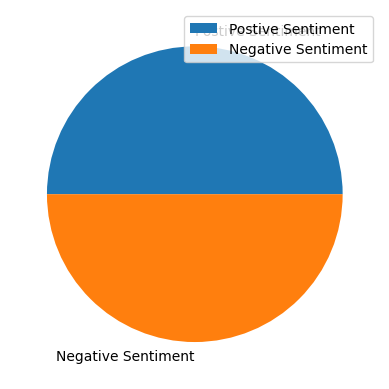

In [ ]:
y = np.array([6000,6000])
mylabels = ["Postive Sentiment", "Negative Sentiment"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show()

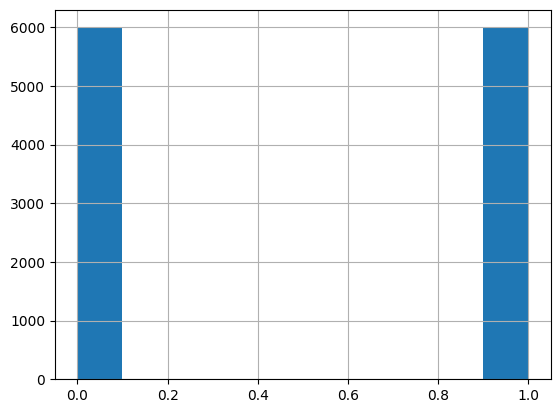

In [ ]:
data.rating.hist()
plt.show()

selecting the data

In [ ]:
my_data=data[:8000]

In [ ]:
my_data

Unnamed: 0.1        asin  helpful  rating  \
0                0  B0033UV8HI  [8, 10]       0   
1                1  B002HJV4DE   [1, 1]       1   
2                2  B002ZG96I4   [0, 0]       0   
3                3  B002QHWOEU   [1, 3]       0   
4                4  B001A06VJ8   [0, 1]       1   
...            ...         ...      ...     ...   
7995          7995  B002X8492M   [0, 0]       0   
7996          7996  B000JML1QG   [0, 0]       0   
7997          7997  B0030H26JS   [0, 1]       0   
7998          7998  B0029ZBK5S   [0, 0]       1   
7999          7999  B002EZZJSM   [0, 0]       1   

                                             reviewText   reviewTime  \
0     Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1     Great short read.  I didn't want to put it dow...   10 8, 2013   
2     I'll start by saying this is the first of four...  04 11, 2014   
3     Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4     I did not expect this type of book to be in li...  12 31, 2012   
...                                                 ...          ...   
7995  I enjoyed the premise of this story. The story...  03 12, 2013   
7996  Though these be the tales of the brothers, the...  04 20, 2013   
7997  A short read, which was good in this case, as ...  02 19, 2013   
7998  In light of the fact that these stories are tr...  09 20, 2013   
7999  I liked it.  The story was well developed & al...  11 23, 2013   

          reviewerID   reviewerName  unixReviewTime  
0     A3HHXRELK8BHQG         Ridley      1283385600  
1     A2RGNZ0TRF578I   Holly Butler      1381190400  
2     A3S0H2HV6U1I7F        Merissa      1397174400  
3      AC4OQW3GZ919J     Cleargrace      1404518400  
4     A3C9V987IQHOQD       Rjostler      1356912000  
...              ...            ...             ...  
7995  A2CI2IJ40O9HHB  Ebony Johnson      1363046400  
7996  A1PSYTEX4HIVAC       DimPoint      1366416000  
7997   AZ2EXXGD7FAD4     AvidReader      1361232000  
7998  A3L5L82GK6KPXN   Heal thyself      1379635200  
7999   AQVURMQUQ8LTQ        Cher812      1385164800  

[8000 rows x 9 columns]

In [ ]:
my_data.rating.value_counts()

rating
1    4015
0    3985
Name: count, dtype: int64

In [ ]:
sentiment_label = my_data.rating.factorize()
sentiment_label

(array([0, 1, 0, ..., 0, 1, 1]), Index([0, 1], dtype='int64'))

In [ ]:
tweet = my_data.reviewText
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           874976    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 891627 (3.40 MB)
Trainable params: 891627 (3.40 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.25,epochs=10,batch_size=64)

Epoch 1/10
94/94 [==============================] - 37s 344ms/step - loss: 0.6520 - accuracy: 0.6003 - val_loss: 0.5583 - val_accuracy: 0.7470
Epoch 2/10
94/94 [==============================] - 33s 350ms/step - loss: 0.4519 - accuracy: 0.8027 - val_loss: 0.4450 - val_accuracy: 0.8035
Epoch 3/10
94/94 [==============================] - 34s 360ms/step - loss: 0.3550 - accuracy: 0.8598 - val_loss: 0.4261 - val_accuracy: 0.8080
Epoch 4/10
94/94 [==============================] - 33s 347ms/step - loss: 0.2872 - accuracy: 0.8870 - val_loss: 0.4270 - val_accuracy: 0.8125
Epoch 5/10
94/94 [==============================] - 35s 375ms/step - loss: 0.2492 - accuracy: 0.9072 - val_loss: 0.5197 - val_accuracy: 0.7995
Epoch 6/10
94/94 [==============================] - 31s 335ms/step - loss: 0.2080 - accuracy: 0.9233 - val_loss: 0.4735 - val_accuracy: 0.8115
Epoch 7/10
94/94 [==============================] - 32s 339ms/step - loss: 0.1722 - accuracy: 0.9385 - val_loss: 0.5193 - val_accuracy: 0.8150

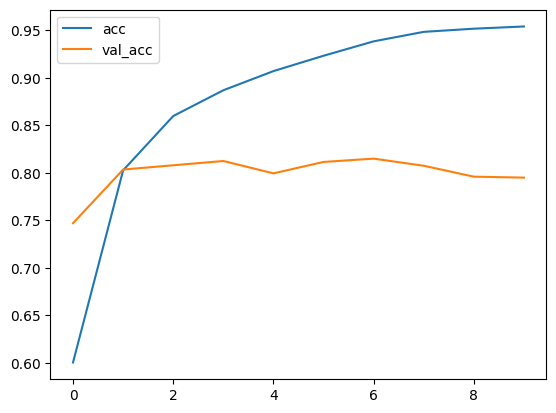

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

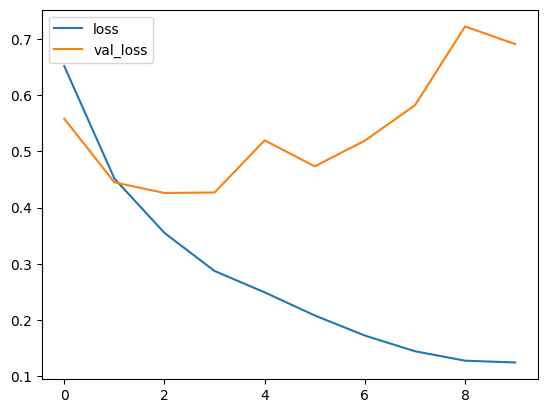

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

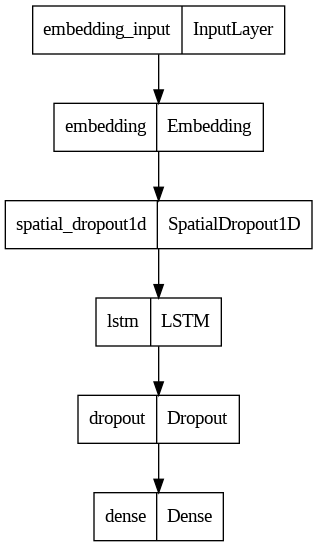

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

Prediction

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]

test_sentence1 = "I like this book."
prediction = predict_sentiment(test_sentence1)

if prediction == 0:
    print("Postive Statement")
else:
    print("Negative Statement")

1/1 [==============================] - 0s 305ms/step
Postive Statement


In [ ]:
import pandas as pd

# Define the mapping from sentiment to emoji
sentiment_to_emoji = {
    "positive": "😊",
    "negative": "😢",
    "neutral": "😐"
}

# Function to map ratings to sentiments
def map_rating_to_sentiment(rating):
    if rating in [4, 5]:
        return "positive"
    elif rating == 3:
        return "neutral"
    elif rating in [1, 2]:
        return "negative"
    else:
        return "neutral"  # Default to neutral if rating is outside expected range

# Load the dataset
# Replace 'amazon.Kindle.review.csv' with your actual CSV file name
try:
    data = pd.read_csv('/content/amazon kindle.review.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path and name.")
    exit()
except pd.errors.EmptyDataError:
    print("The file is empty. Please check the file content.")
    exit()
except pd.errors.ParserError:
    print("The file could not be parsed. Please check if it's a valid CSV.")
    exit()

# Check if required columns exist
if 'reviewText' not in data.columns or 'rating' not in data.columns:
    print("The required columns 'reviewText' and 'ratings' are not present in the CSV file.")
    exit()

# Add a sentiment column based on the ratings
data['sentiment'] = data['rating'].apply(map_rating_to_sentiment)

# Function to display reviews with corresponding sentiment emojis
def display_reviews_with_emojis(data):
    for index, row in data.iterrows():
        review = row.get('reviewText', "No review text")
        sentiment = row.get('sentiment', "neutral")  # Default to neutral if not specified
        emoji = sentiment_to_emoji.get(sentiment, "😐")  # Default to neutral emoji
        print(f"{emoji} {review}")

# Display the reviews with emojis
display_reviews_with_emojis(data)

# Calculate and print the final analysis
def final_analysis(data):
    total_reviews = len(data)
    positive_reviews = len(dataframe[data['sentiment'] == 'positive'])
    neutral_reviews = len(dataframe[data['sentiment'] == 'neutral'])
    negative_reviews = len(dataframe[data['sentiment'] == 'negative'])

    positive_percentage = (positive_reviews / total_reviews) * 100
    neutral_percentage = (neutral_reviews / total_reviews) * 100
    negative_percentage = (negative_reviews / total_reviews) * 100

    print("\nFinal Analysis:")
    print(f"Total Reviews: {total_reviews}")
    print(f"Positive Reviews: {positive_reviews} ({positive_percentage:.2f}%)")
    print(f"Neutral Reviews: {neutral_reviews} ({neutral_percentage:.2f}%)")
    print(f"Negative Reviews: {negative_reviews} ({negative_percentage:.2f}%)")

# Perform the final analysis
final_analysis(data)


Streaming output truncated to the last 5000 lines.
😊 This is the 3rd book, and my second time through, it's still a good, exciting and loving story, about sharing and making sacrifices for those you love. Were that life was so easy!
😢 No, not my type. I love ghost stories, but did not enjoy this book. However, someone else may enjoy it. I never let other peoples' opinion put me off from trying a book that looks interesting. As I said, this is just not MY kind of story.
😢 I can't believe this was listed as a romance.  I read romance novels because I'm looking for something uplifting.  This book was dark & depressing.  I didn't find the story or the writing to be bad.  Just depressing.  Sex was very high overview and it didn't go into any depth on the developement of the characters relationship.Spoiler Alert ****If you like a happy ending, forget this.  It was said in other reviews, but I guess not strongly enough for me to truly understand. Hopefully I can say this plainly enough that o

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




😢 Overly &#34;wordy&#34; with two much needeless detail.  I had a hard time staying interested. There were too many detours from the main topic.
😊 Really liked this book from the standpoint of the inner workings of the machines. Didnt really care for the last part of the book but the history more than made up for it.
😊 Thank my LUCKY CHARMS I finished this book.  I was very skeptical about a book that had "magic" in it, however I found myself able to follow the storyline very well.  I could easily see this book as a movie.  As I read the book I found that I could picture every scene as the writer laid it out.  I could even picture each character and their demeanor.  I really enjoyed this book the story line.  The ending was not what I expected and left me with a smile on my face as I finished the last page.  Definetely a good read for any first time mythical, magical, other rhelm readers like myself.
😢 The plot of the beginning was not bad. But when the author tried to justify breakin

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

